This is my first mini project of NLP, it is about doing a deep analyse of opinions on a some product of Amazon.


# Introduction 

Uses product review data (e.g. from Amazon or IMDb) to classify reviews as positive, negative, or neutral. 

let's first prepare our environement

In [2]:
pip install nltk textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


# Our dataset

This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. for learning how to train Machine for sentiment analysis.

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sid321axn/amazon-alexa-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-alexa-reviews


In [6]:
import pandas as pd
df = pd.read_csv("/kaggle/input/amazon-alexa-reviews/amazon_alexa.tsv", sep="\t")

In [29]:
df.shape

(3150, 7)

In [7]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


# Preprocessing of our dataset

Now we're going to define a function to preprocess our reviews (texts) 

This function will convert the text to minisculs then delete stopwords and punctuation.
to delete stopwords we should first tokenize our text with nltk library then work with.

In [8]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [9]:
# To dowloand stopwords 
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def preprocess_text(text):
    if isinstance(text, str): # Because sometimes we have the value Nan and not a text
        # convert to min
        text = text.lower()
    
        # delete pontuation
        text = ''.join([c for c in text if c not in string.punctuation])
    
        #tokenize text
        tokens = word_tokenize(text)
    
        # delete stopwords
        filtered_words = [word for word in tokens if word not in stop_words]
    
        return ' '.join(filtered_words)

    else: 
        return ''

In [11]:
# apply to our column
df['cleaned_reviews'] = df['verified_reviews'].apply(preprocess_text)

In [12]:
# show results
print(df[['verified_reviews', 'cleaned_reviews']].head())

                                    verified_reviews  \
0                                      Love my Echo!   
1                                          Loved it!   
2  Sometimes while playing a game, you can answer...   
3  I have had a lot of fun with this thing. My 4 ...   
4                                              Music   

                                     cleaned_reviews  
0                                          love echo  
1                                              loved  
2  sometimes playing game answer question correct...  
3  lot fun thing 4 yr old learns dinosaurs contro...  
4                                              music  


### **So now we have a text without ponctuation and without stopwords ready to use in our model.**

In [14]:
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


# Sentiment analysis

For this task of sentiment analysis we can use the library TextBlob.

In [15]:
# Let's import the bib
from textblob import TextBlob

In [17]:
# And now we're going to define the function de analyze sentiment 
def analyse_sentiment(text):
    blob = TextBlob(text) #to compute sentiment polarity
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return "positif"
    elif sentiment < 0:
        return "negatif"
    else:
        return "neutral"

In [18]:
df['sentiment'] = df['cleaned_reviews'].apply(analyse_sentiment)

In [19]:
print(df[['cleaned_reviews','sentiment']].head())

                                     cleaned_reviews sentiment
0                                          love echo   positif
1                                              loved   positif
2  sometimes playing game answer question correct...   negatif
3  lot fun thing 4 yr old learns dinosaurs contro...   positif
4                                              music   neutral


In [20]:
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_reviews,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo,positif
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved,positif
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...,negatif
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...,positif
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,neutral


In [59]:
df['feedback'].value_counts()

feedback
1    2893
0     257
Name: count, dtype: int64

# Visualisation

Let's now see some visualisation of our results

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

create a graphique

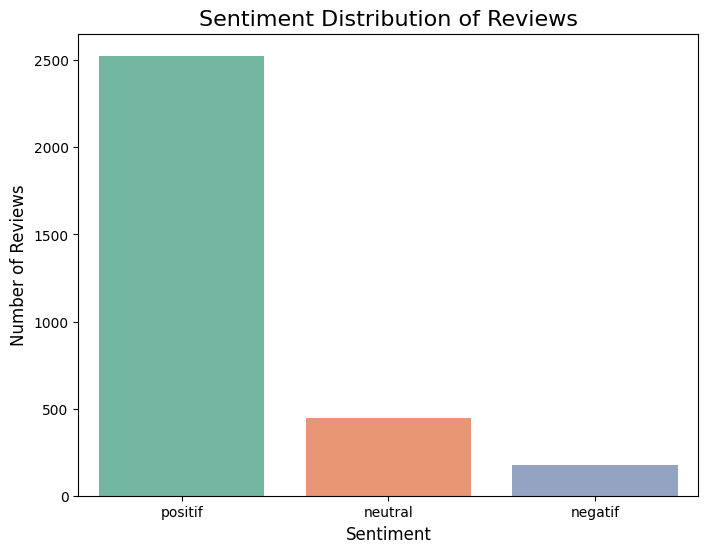

In [37]:
# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
plt.title('Sentiment Distribution of Reviews', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()

Another visualisation based on every product

<Figure size 1200x800 with 0 Axes>

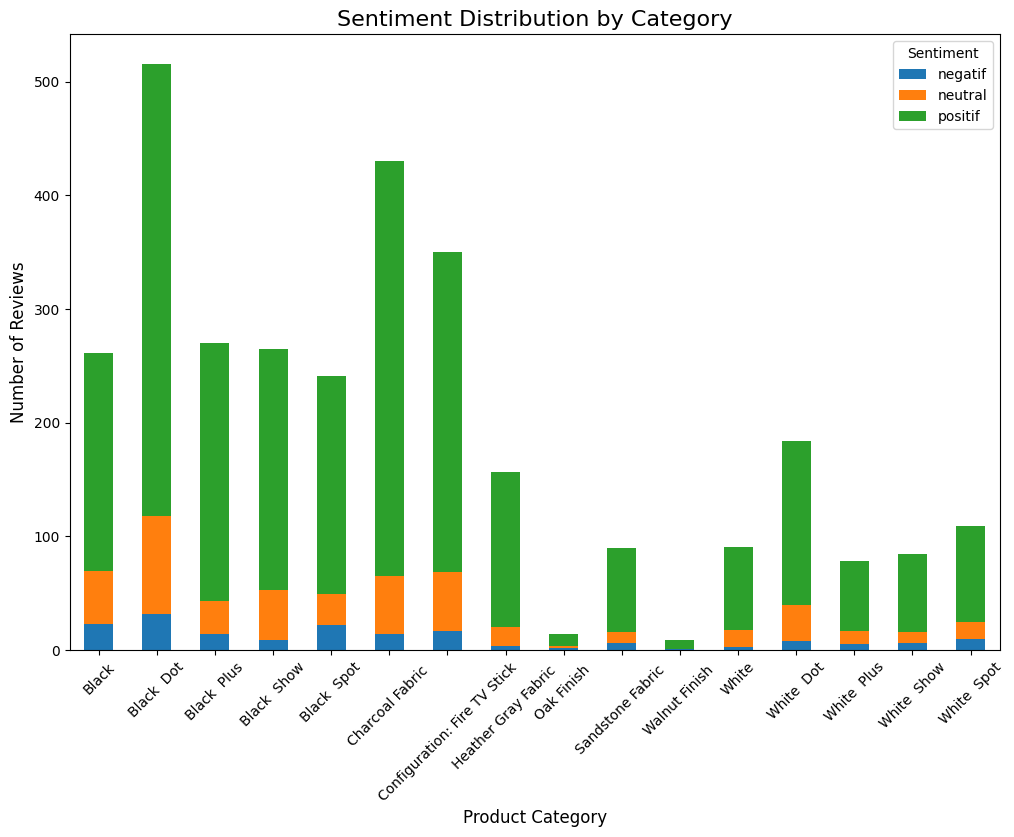

In [52]:
# Assuming you have a column called 'variation'
plt.figure(figsize=(12, 8))
sentiment_by_category = df.groupby(['variation', 'sentiment']).size().unstack()

# Plotting the stacked bar chart
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution by Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right')
plt.show()

Another visualisation with Pie Chart

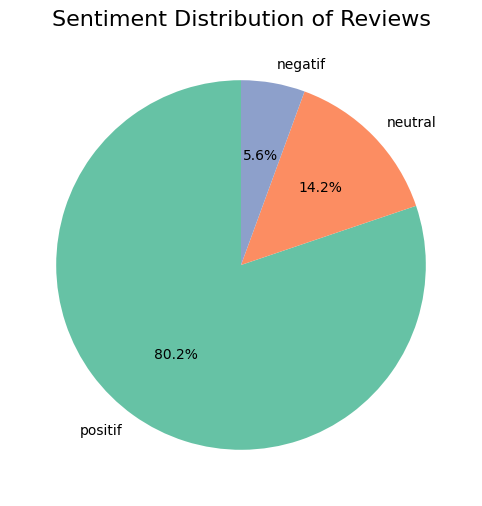

In [63]:
# Plotting a pie chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'), legend=False)
plt.title('Sentiment Distribution of Reviews', fontsize=16)
plt.ylabel('')  # Remove the y-label
plt.show()

# **End of the project ✅**